In [ ]:
#normal distribution , guasian distribution, bell curve. 

import pandas as pd
prestigedataframe=pd.read_csv('../../inputdata/trading/PRESTIGE.NS.csv')
prestigedataframe.drop(index=0)
print(prestigedataframe)
sobhadataframe=pd.read_csv('../../inputdata/trading/SOBHA.NS.csv')
sobhadataframe['ClosePrev']=sobhadataframe['Close'].shift(1)
sobhadataframe.drop(index=0)




In [9]:
# print(prestigedataframe.head(5))
# print(sobhadataframe.head(5))

psmergedf=pd.merge(left =prestigedataframe,right=sobhadataframe[['Date','ClosePrev']] ,on='Date', how='inner')
print(psmergedf)



#set the date time index
psmergedf= psmergedf.set_index(pd.DatetimeIndex(psmergedf['Date']))



           Date         Open         High          Low        Close  \
0    2023-06-19   577.500000   578.700012   561.500000   569.150024   
1    2023-06-20   570.900024   579.650024   562.000000   578.000000   
2    2023-06-21   581.700012   582.599976   569.049988   575.799988   
3    2023-06-22   575.900024   580.000000   569.200012   575.599976   
4    2023-06-23   577.700012   580.000000   569.400024   576.700012   
..          ...          ...          ...          ...          ...   
238  2024-06-10  1771.949951  1870.000000  1767.599976  1841.349976   
239  2024-06-11  1877.900024  1899.449951  1843.550049  1872.250000   
240  2024-06-12  1867.599976  1870.000000  1802.349976  1847.750000   
241  2024-06-13  1869.949951  1910.000000  1854.199951  1872.599976   
242  2024-06-14  1910.949951  1998.000000  1901.000000  1926.849976   

       Adj Close   Volume    ClosePrev  
0     567.771912   435858          NaN  
1     576.600464   290412   549.950012  
2     574.405762   26407

Text(0, 0.5, 'Close price')

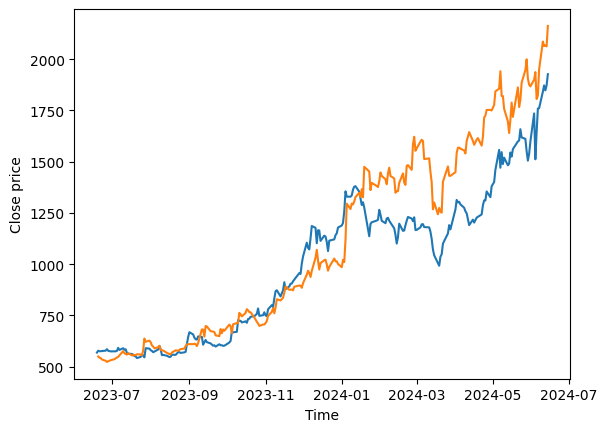

In [10]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.plot(psmergedf.Close)
plt.xlabel('Time')
plt.ylabel("Close price")


plt.plot(psmergedf.ClosePrev)
plt.xlabel('Time')
plt.ylabel("Close price")

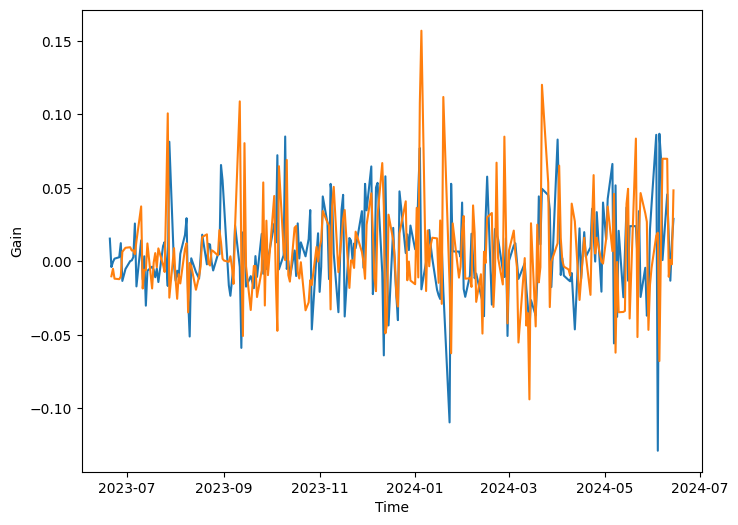

In [14]:
import matplotlib.pyplot as plt
import seaborn as sb

psmergedf['GAIN']=psmergedf.Close.pct_change(periods=1)
psmergedf['SPGAIN']=psmergedf.ClosePrev.pct_change(periods=1)


plt.figure(figsize=(8,6))
plt.plot(psmergedf['GAIN'])#,sobhadf['GAIN'])
plt.xlabel('Time')
plt.ylabel("Gain")


plt.plot(psmergedf['SPGAIN'])#,sobhadf['GAIN'])
plt.xlabel('Time')
plt.ylabel("Gain")
plt.show()



/var/folders/fl/jjn6m41x5390r7wk1j906b2c0000gr/T/ipykernel_91790/3293902782.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(psmergedf.GAIN, label ="Prestige")
/var/folders/fl/jjn6m41x5390r7wk1j906b2c0000gr/T/ipykernel_91790/3293902782.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(psmerge

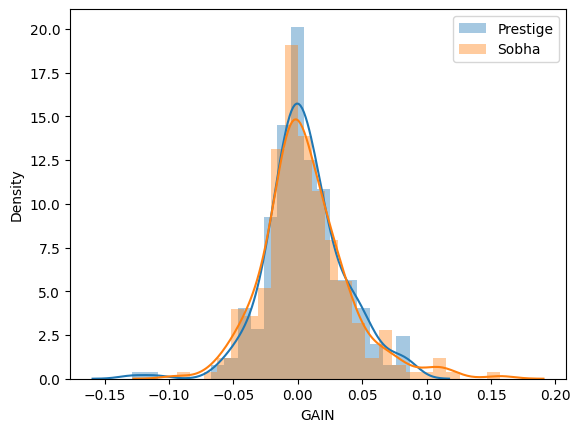

In [15]:
import seaborn as sn 

sn.distplot(psmergedf.GAIN, label ="Prestige")
sn.distplot(psmergedf.SPGAIN,label="Sobha")
plt.xlabel("GAIN")
plt.ylabel("Density")
plt.legend();

In [ ]:
# Mean and variance
mean =prestigedf.GAIN.mean()
sd=prestigedf.GAIN.std()
print("prestige",mean, sd)

mean = sobhadf.GAIN.mean()
sd=sobhadf.GAIN.std()

print("sobha" , mean, sd)

In [ ]:
#for 95% time what is the gain probabaliyt range
#Cummulative distribution 

# To find out what is the expected range of return for 95% confidence interval, we need to calculate the values gain for two standard deviation away from the mean on both sides of the distribution i.e. 
# 𝜇±2𝜎.
# For advanced statistical analysis, we can use Python library scipy.stats. The library contains sub-packages for analyzing different distributions. For example, methods to analyze normal distribution are given by stats. norm. The interval() method of stats.norm gives the confidence interval for a normal distribution.
# stats.norm.interval() takes three parameters:
# 1. alpha: It is the interval, for example, 0.9 for 90% confidence interval.
# 2. loc: It is the location parameter of the distribution. It is mean for normal distribution.
# 3. scale: It is the scale parameter of the distribution. It is the standard deviation for normal distribution.

from scipy import stats

stats.norm.interval(.95,loc=sobhadf['GAIN'].mean(),scale=sobhadf['GAIN'].std())


# to find the probability of making the gain of more than 2%
print("sobha probability of more than 2% loss",stats.norm.cdf(-.02,loc=sobhadf['GAIN'].mean(),scale=sobhadf['GAIN'].std())*100)

# to find the probability of making the loss of more than 2%
print("prestigedf probability of more than 2% loss",(stats.norm.cdf(-.02,loc=prestigedf['GAIN'].mean(),scale=prestigedf['GAIN'].std()))*100)

print("prestige probability of more than 2% gain",(1-stats.norm.cdf(.02,loc=prestigedf['GAIN'].mean(),scale=prestigedf['GAIN'].std()))*100)

# to find the probability of making the gain of more than 2%
print("sobha probability of more than 2% gain",(1-stats.norm.cdf(.02,loc=sobhadf['GAIN'].mean(),scale=sobhadf['GAIN'].std()))*100)



Date
2023-06-19            NaN
2023-06-20     549.950012
2023-06-21     544.400024
2023-06-22     541.700012
2023-06-23     535.349976
                 ...     
2024-06-10    2086.000000
2024-06-11    2064.250000
2024-06-12    2066.500000
2024-06-13    2062.500000
2024-06-14    2162.250000
Name: ClosePrev, Length: 243, dtype: float64
2 test result TtestResult(statistic=nan, pvalue=nan, df=nan)  p value less then .05 means they are significantly different 


/var/folders/fl/jjn6m41x5390r7wk1j906b2c0000gr/T/ipykernel_91790/757437169.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(sample1, label="sample 1")
/var/folders/fl/jjn6m41x5390r7wk1j906b2c0000gr/T/ipykernel_91790/757437169.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(sample2, label=

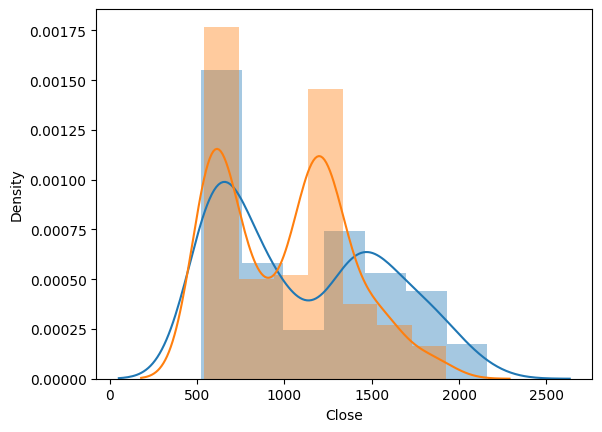

In [18]:
# Hypothesis Test: 
# The hypothesis is a claim and the objective of hypothesis testing is to either reject or retain a null hypothesis (current belief) with the help of data. Hypothesis testing consists of two complementary statements called null hypothesis and alternative hypothesis. Null hypothesis is an existing belief and alternate hypothesis is what we intend to establish with new evidence (samples).
# Hypothesis tests are broadly classified into parametric tests and non-parametric tests. Parametric tests are about population parameters of distribution such as mean, proportion, standard deviation, etc., whereas non-parametric tests are not about parameters, but about other characteristics such as independence of events or data following certain distributions such as normal distribution.
import seaborn as sn

#	One-Sample T-Test:
#  The t-test is used when the population standard deviation S is unknown (and hence estimated from the sample) and is estimated from the sample. The expected value (mean) of a sample of independent observations is equal to the given population mean.
 
from scipy import stats


# 	Two-Sample T-Test:
# A two-sample t-test is required to test the difference between two population means where standard deviations are unknown. The parameters are estimated from the samples.

sample1 =psmergedf.ClosePrev
print(sample1)
#sample1=sample1.pop(0)
sample2 =psmergedf.Close

sn.distplot(sample1, label="sample 1")
sn.distplot(sample2, label= "sample2")
print("2 test result",stats.ttest_ind(sample1, sample2)," p value less then .05 means they are significantly different ")


# Chi-Square Goodness of Fit Test: 

# The Chi-square goodness of fit test is a non-parametric test used for comparing the observed distribution of data with the expected distribution of the data to decide whether there is any statistically significant difference between the observed distribution and theoretical distribution.

#result =stats.chisquare(sample1,sample2)
#print ("chi 2 test result",result,"  p value less then .05 means they are significantly different")




                  Date         Open         High          Low        Close  \
Date                                                                         
2023-06-19  2023-06-19   577.500000   578.700012   561.500000   569.150024   
2023-06-20  2023-06-20   570.900024   579.650024   562.000000   578.000000   
2023-06-21  2023-06-21   581.700012   582.599976   569.049988   575.799988   
2023-06-22  2023-06-22   575.900024   580.000000   569.200012   575.599976   
2023-06-23  2023-06-23   577.700012   580.000000   569.400024   576.700012   
...                ...          ...          ...          ...          ...   
2024-06-10  2024-06-10  1771.949951  1870.000000  1767.599976  1841.349976   
2024-06-11  2024-06-11  1877.900024  1899.449951  1843.550049  1872.250000   
2024-06-12  2024-06-12  1867.599976  1870.000000  1802.349976  1847.750000   
2024-06-13  2024-06-13  1869.949951  1910.000000  1854.199951  1872.599976   
2024-06-14  2024-06-14  1910.949951  1998.000000  1901.000000  1

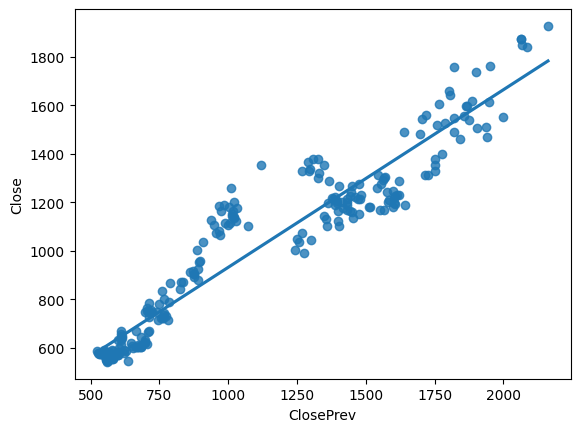

In [20]:
import statsmodels.api as sm 
import matplotlib.pyplot as py
import pandas as pd

X=sm.add_constant(psmergedf['ClosePrev'])
X.head(5)
print(psmergedf)
#prestigedf.drop(index='2023-06-19',inplace=True)
Y=psmergedf['Close']
sn.regplot(x=psmergedf['ClosePrev'],y=Y,ci=0)

print(psmergedf)


In [21]:
# Splitting the dataset into training & Validating sets: 

# train_test_split() function from skelarn.model_selection module provides the ability to split the dataset randomly into training and validation datasets. The parameter train_size takes a fraction between 0 and 1 for specifying training set size. The remaining samples in the original set will be test or validation set. The samples that are selected for training and test set are randomly sampled. The method takes a seed value in a parameter named random_state, to fix which samples go to training and which ones go to the test set. 

from sklearn.model_selection import train_test_split
train_x,test_x, train_y, test_y=train_test_split(X,Y,test_size=.8,random_state=100)

train_y.head(5)


# We will fit the model using OLS method and pass train_y and train_X as parameters. 

# The fit() method on OLS() estimates the parameters and returns model information to the variable mba_ salary_lm, which contains the model parameters, accuracy measures, and residual values among other details. 

lm=sm.OLS(train_y,train_x).fit()
print(lm.params)
lm.summary2()

const        181.586651
ClosePrev      0.783095
dtype: float64


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.892   
Dependent Variable: Close            AIC:                595.6511
Date:               2024-06-18 13:02 BIC:                599.3935
No. Observations:   48               Log-Likelihood:     -295.83 
Df Model:           1                F-statistic:        387.6   
Df Residuals:       46               Prob (F-statistic): 4.81e-24
R-squared:          0.894            Scale:              13777.  
------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025   0.975] 
------------------------------------------------------------------
const       181.5867   44.2520   4.1035  0.0002  92.5120  270.6613
ClosePrev     0.7831    0.0398  19.6872  0.0000   0.7030    0.8632
-----------------------------------------------------------------
Omnibus:              1.591        Durbin-Watson:           1.935
Prob(Omnibus):        0.451        Jarque-Bera (JB):        0.993
Skew:                 0.343        Prob(JB):                0.609
Kurtosis:             3.160        Condition No.:           2906 
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 2.91e+03. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

In [22]:
# Splitting the dataset into training & Validating sets: 

# train_test_split() function from skelarn.model_selection module provides the ability to split the dataset randomly into training and validation datasets. The parameter train_size takes a fraction between 0 and 1 for specifying training set size. The remaining samples in the original set will be test or validation set. The samples that are selected for training and test set are randomly sampled. The method takes a seed value in a parameter named random_state, to fix which samples go to training and which ones go to the test set. 

from sklearn.model_selection import train_test_split
train_x,test_x, train_y, test_y=train_test_split(X,Y,test_size=.8,random_state=100)

train_y.head(5)


# We will fit the model using OLS method and pass train_y and train_X as parameters. 

# The fit() method on OLS() estimates the parameters and returns model information to the variable mba_ salary_lm, which contains the model parameters, accuracy measures, and residual values among other details. 

lm=sm.OLS(train_y,train_x).fit()
print(lm.params)
lm.summary2()

const        181.586651
ClosePrev      0.783095
dtype: float64


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.892   
Dependent Variable: Close            AIC:                595.6511
Date:               2024-06-18 13:03 BIC:                599.3935
No. Observations:   48               Log-Likelihood:     -295.83 
Df Model:           1                F-statistic:        387.6   
Df Residuals:       46               Prob (F-statistic): 4.81e-24
R-squared:          0.894            Scale:              13777.  
------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025   0.975] 
------------------------------------------------------------------
const       181.5867   44.2520   4.1035  0.0002  92.5120  270.6613
ClosePrev     0.7831    0.0398  19.6872  0.0000   0.7030    0.8632
-----------------------------------------------------------------
Omnibus:              1.591        Durbin-Watson:           1.935
Prob(Omnibus):        0.451        Jarque-Bera (JB):        0.993
Skew:                 0.343        Prob(JB):                0.609
Kurtosis:             3.160        Condition No.:           2906 
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 2.91e+03. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

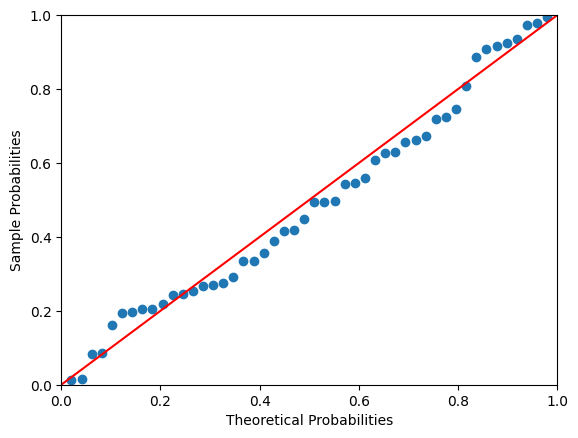

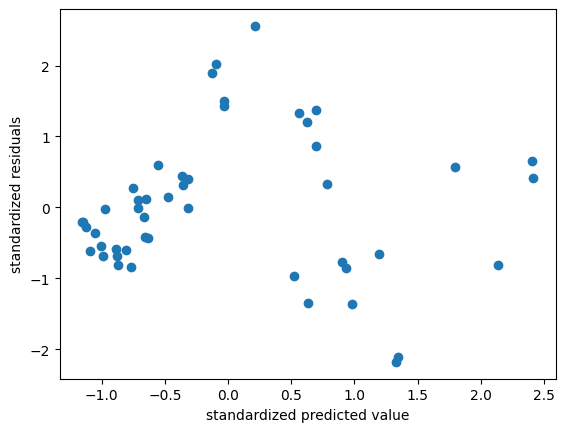

In [23]:
import matplotlib.pyplot as plt
probplot=sm.ProbPlot(lm.resid,fit=True)
probplot.ppplot(line='45')
plt.show()

#variance of residual is constant(homosedasticity), independed of x, if funnel shape then hetrosedastic
def standardizedvalue(vals):
    return (vals-vals.mean())/vals.std()

plt.scatter(standardizedvalue(lm.fittedvalues),standardizedvalue(lm.resid))
plt.xlabel("standardized predicted value")
plt.ylabel("standardized residuals")
plt.show()